In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
dosya_yolu = '/content/drive/MyDrive/Colab Notebooks/Veri Bilimi/AAPL.csv'

In [3]:
# gerekli kütüphaneler
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import plotly.graph_objects as go
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import shapiro, normaltest, anderson

In [4]:
# Veri setini yükleme
df = pd.read_csv(dosya_yolu)

In [5]:
# Veri setini görüntüleme - ilk 5 veri
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-16,44.474998,44.847500,44.035000,44.047501,41.651932,118263600
1,2018-01-17,44.037498,44.812500,43.767502,44.775002,42.339878,137547200
2,2018-01-18,44.842499,45.025002,44.562500,44.814999,42.377689,124773600
3,2018-01-19,44.652500,44.895000,44.352501,44.615002,42.188580,129700400
4,2018-01-22,44.325001,44.445000,44.150002,44.250000,41.843418,108434400


In [ ]:
# Veri setini görüntüleme - son 5 veri
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1486,2023-12-11,193.110001,193.490005,191.419998,193.179993,193.179993,60943700
1487,2023-12-12,193.080002,194.720001,191.720001,194.710007,194.710007,52696900
1488,2023-12-13,195.089996,198.000000,194.850006,197.960007,197.960007,70404200
1489,2023-12-14,198.020004,199.619995,196.160004,198.110001,198.110001,66831600
1490,2023-12-15,197.529999,198.399994,197.000000,197.570007,197.570007,128256700


In [6]:
# Veri seti kolon isimleri
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [7]:
# data type
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [8]:
# Veri seti kolon veritipleri
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1491 entries, 0 to 1490
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1491 non-null   object 
 1   Open       1491 non-null   float64
 2   High       1491 non-null   float64
 3   Low        1491 non-null   float64
 4   Close      1491 non-null   float64
 5   Adj Close  1491 non-null   float64
 6   Volume     1491 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 81.7+ KB


In [9]:
# satır ve sütun sayıları
df.shape

(1491, 7)

In [10]:
# veri seti matris boyutu
df.ndim

2

In [11]:
# toplam veri adeti
df.size

10437

In [12]:
# 10, 100 ve 1000 sütunlar getirme - kontrol
df.loc[[10, 100, 1000]]

,Date,Open,High,Low,Close,Adj Close,Volume
10,2018-01-30,41.382500,41.842499,41.174999,41.742500,39.472294,184192800
100,2018-06-08,47.792500,48.000000,47.442501,47.924999,45.678795,106627200
1000,2022-01-04,182.630005,182.940002,179.119995,179.699997,177.669968,99310400


In [13]:
# tarih kolonun da unique olan verilerin kontrolü
df["Date"].unique()

array(['2018-01-16', '2018-01-17', '2018-01-18', ..., '2023-12-13',
       '2023-12-14', '2023-12-15'], dtype=object)

In [14]:
# tarih kolonun da unique değerlerin sayısı
df["Date"].nunique()

1491

In [15]:
# 2023'ten kaç tane veri var ?
len(df[df.Date > "2023-01-01"])

241

In [16]:
# kolonlarda boş değerler var mı
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [17]:
# ortalam
df.mean()

<ipython-input-17-eb23926447c3>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


Open         1.102194e+02
High         1.114863e+02
Low          1.090474e+02
Close        1.103260e+02
Adj Close    1.087356e+02
Volume       1.077971e+08
dtype: float64

In [18]:
# medyan
df.median()

<ipython-input-18-091d7e1128bb>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


Open         1.236600e+02
High         1.249800e+02
Low          1.221400e+02
Close        1.235400e+02
Adj Close    1.216024e+02
Volume       9.329200e+07
dtype: float64

In [21]:
# mod
print(df['Open'].mode())
print("High: \n" + str(df['High'].mode()))
print("Low: \n" + str(df['Low'].mode()))
print("Close: \n" + str(df['Close'].mode()))
print("Adj Close: \n" + str(df['Adj Close'].mode()))

0    127.820000
1    142.699997
Name: Open, dtype: float64
High: 
0    151.570007
Name: High, dtype: float64
Low: 
0    133.770004
1    142.649994
2    147.679993
Name: Low, dtype: float64
Close: 
0    145.860001
1    163.759995
2    175.839996
Name: Close, dtype: float64
Adj Close: 
0      41.017090
1      41.809361
2      44.832893
3      54.248791
4      89.133003
5     119.666565
6     125.046890
7     140.444199
8     143.569794
9     147.433731
10    163.098389
11    167.184952
12    170.244827
13    171.611877
14    173.102188
15    175.608643
Name: Adj Close, dtype: float64


In [22]:
# standart sapma
df.std()

<ipython-input-22-797d75bfc3ab>:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.std()


Open         5.062023e+01
High         5.114602e+01
Low          5.013299e+01
Close        5.067006e+01
Adj Close    5.102660e+01
Volume       5.521541e+07
dtype: float64

In [23]:
# varyans
df.var()

<ipython-input-23-bac5d9bb4bd6>:2: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.var()


Open         2.562408e+03
High         2.615915e+03
Low          2.513317e+03
Close        2.567455e+03
Adj Close    2.603714e+03
Volume       3.048742e+15
dtype: float64

In [24]:
# aralık
print("Open: " + str(np.ptp(df["Open"])))
print("High: " + str(np.ptp(df["High"])))
print("Low: " + str(np.ptp(df["Low"])))
print("Close: " + str(np.ptp(df["Close"])))
print("Adj Close: " + str(np.ptp(df["Adj Close"])))

Open: 162.025005
High: 163.18999499999998
Low: 161.5
Close: 162.5625
Adj Close: 163.99111200000002


In [25]:
# çarpıklık
df.skew()

<ipython-input-25-83ebc6e063f4>:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


Open        -0.061898
High        -0.069493
Low         -0.052948
Close       -0.061569
Adj Close   -0.051804
Volume       1.968944
dtype: float64

<ipython-input-27-a225a8ae0bbb>:2: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  kurtosis_values = df.kurtosis()


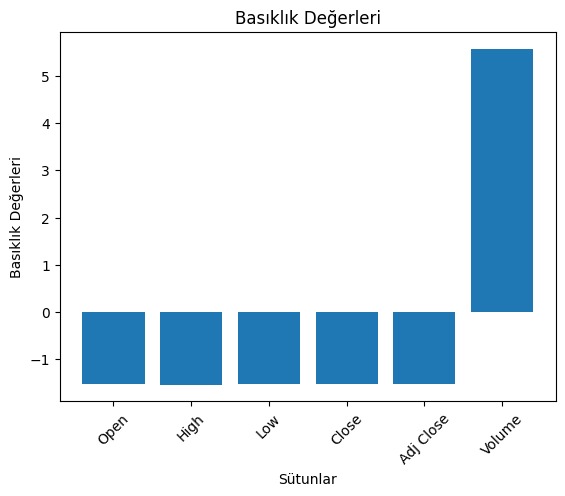

In [27]:
# basıklık
kurtosis_values = df.kurtosis()

# Basıklık değerlerini görselleştirelim
plt.bar(kurtosis_values.index, kurtosis_values)
plt.xlabel('Sütunlar')
plt.ylabel('Basıklık Değerleri')
plt.title('Basıklık Değerleri')
plt.xticks(rotation=45)
plt.show()

In [26]:
# yüzdelik %25, %50, %75
print("%25\n", df.quantile(0.25, numeric_only=True))
print("%50\n", df.quantile(0.50, numeric_only=True))
print("%75\n", df.quantile(0.75, numeric_only=True))

%25
 Open         5.425375e+01
High         5.494750e+01
Low          5.366250e+01
Close        5.413250e+01
Adj Close    5.199073e+01
Volume       7.108655e+07
Name: 0.25, dtype: float64
%50
 Open         1.236600e+02
High         1.249800e+02
Low          1.221400e+02
Close        1.235400e+02
Adj Close    1.216024e+02
Volume       9.329200e+07
Name: 0.5, dtype: float64
%75
 Open         1.522400e+02
High         1.542500e+02
Low          1.504000e+02
Close        1.524400e+02
Adj Close    1.511226e+02
Volume       1.284988e+08
Name: 0.75, dtype: float64


In [28]:
# veri tekrarı
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1486    False
1487    False
1488    False
1489    False
1490    False
Length: 1491, dtype: bool

In [29]:
# kolonlara ait istatistiki bilgiler
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1.491000e+03
mean,110.219390,111.486263,109.047396,110.325951,108.735566,1.077971e+08
std,50.620231,51.146017,50.132989,50.670056,51.026600,5.521541e+07
min,35.994999,36.430000,35.500000,35.547501,34.118889,2.404830e+07
25%,54.253749,54.947500,53.662501,54.132500,51.990730,7.108655e+07
50%,123.660004,124.980003,122.139999,123.540001,121.602386,9.329200e+07
75%,152.239998,154.250000,150.400002,152.439995,151.122581,1.284988e+08
max,198.020004,199.619995,197.000000,198.110001,198.110001,4.265100e+08


In [30]:
# veri setine ait korelasyon değerleri
df.corr()

<ipython-input-30-59555e3f2463>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999749,0.999695,0.999364,0.999311,-0.467459
High,0.999749,1.000000,0.999633,0.999695,0.999626,-0.461596
Low,0.999695,0.999633,1.000000,0.999711,0.999685,-0.475142
Close,0.999364,0.999695,0.999711,1.000000,0.999949,-0.468849
Adj Close,0.999311,0.999626,0.999685,0.999949,1.000000,-0.470461
Volume,-0.467459,-0.461596,-0.475142,-0.468849,-0.470461,1.000000


<ipython-input-31-8a577b0c9e72>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


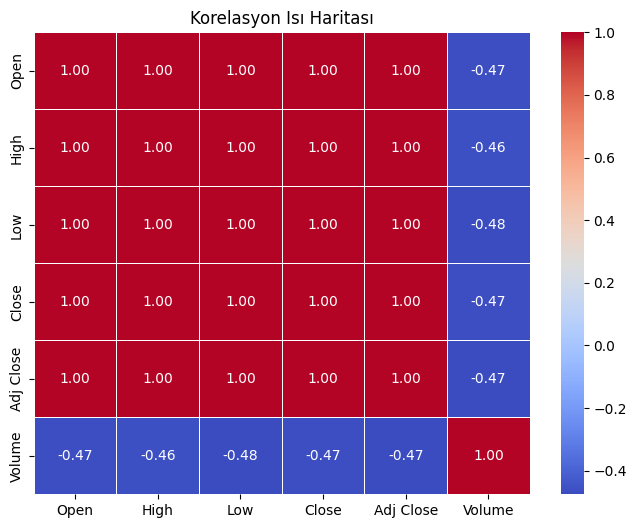

In [31]:
# Korelasyon matrisi
correlation_matrix = df.corr()

# Korelasyon ısı haritası
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Korelasyon Isı Haritası')
plt.show()

In [32]:
# Shapiro-Wilk testini uygulayalım
statistic, p_value = shapiro(df['Volume'])

# Test istatistiği ve p değeri
print("Shapiro-Wilk Test İstatistiği:", statistic)
print("P Değeri:", p_value)

# P değerini alfa düzeyiyle karşılaştırarak hipotez testi
alpha = 0.05
if p_value > alpha:
    print("H0 reddedilemez, örneklem normal dağılımdan gelmektedir.")
else:
    print("H0 reddedilir, örneklem normal dağılımdan gelmemektedir.")

Shapiro-Wilk Test İstatistiği: 0.838366687297821
P Değeri: 1.9755886903233567e-36
H0 reddedilir, örneklem normal dağılımdan gelmemektedir.


In [33]:
# normaltest() fonksiyonunu uygulayalım
statistic, p_value = normaltest(df['Volume'])

# Test istatistiği ve p değeri
print("Normaltest İstatistiği:", statistic)
print("P Değeri:", p_value)

# P değerini alfa düzeyiyle karşılaştırarak hipotez testi
alpha = 0.05
if p_value > alpha:
    print("H0 reddedilemez, örneklem normal dağılımdan gelmektedir.")
else:
    print("H0 reddedilir, örneklem normal dağılımdan gelmemektedir.")

Normaltest İstatistiği: 623.3088146892537
P Değeri: 4.469002827144171e-136
H0 reddedilir, örneklem normal dağılımdan gelmemektedir.


In [34]:
# Anderson-Darling testini uygulayalım
result = anderson(df['Volume'])

# Test istatistiği ve eleştiri değeri
print("Anderson-Darling Test İstatistiği:", result.statistic)
print("Eleştiri Değerleri:", result.critical_values)

# P değerini alfa düzeyiyle karşılaştırarak hipotez testi
alpha = 0.05
if result.statistic < result.critical_values[2] and all(result.statistic < result.critical_values):
    print("H0 reddedilemez, örneklem normal dağılımdan gelmektedir.")
else:
    print("H0 reddedilir, örneklem normal dağılımdan gelmemektedir.")

Anderson-Darling Test İstatistiği: 54.28376299113188
Eleştiri Değerleri: [0.574 0.654 0.785 0.916 1.089]
H0 reddedilir, örneklem normal dağılımdan gelmemektedir.


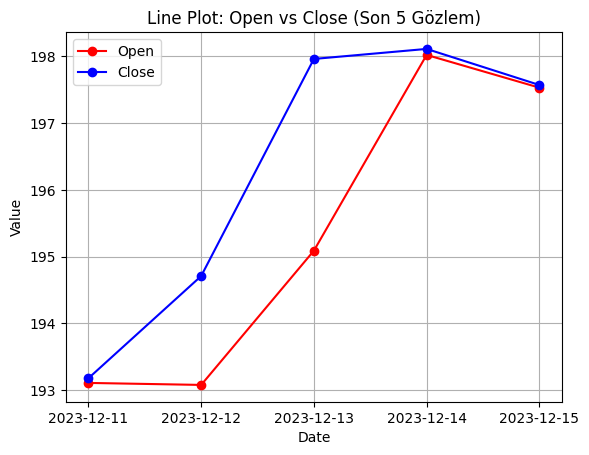

In [ ]:
# Son 5 gözlemin Open ve Close değerlerini kullanarak line plot çizme
plt.plot(df['Date'].tail(5), df['Open'].tail(5), marker='o', linestyle='-', color='red', label='Open')
plt.plot(df['Date'].tail(5), df['Close'].tail(5), marker='o', linestyle='-', color='blue', label='Close')

plt.title('Line Plot: Open vs Close (Son 5 Gözlem)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

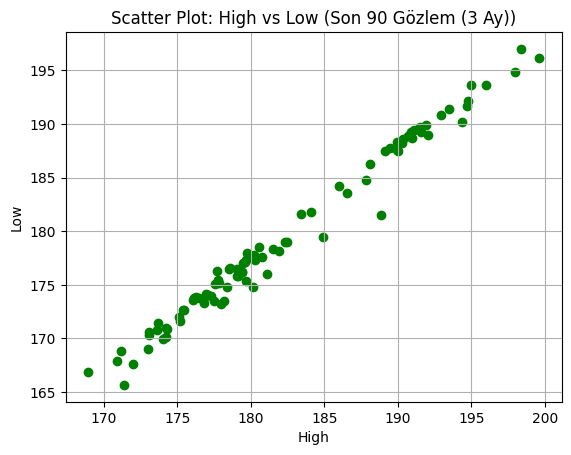

In [ ]:
# Son 90 gözlemin High ve Low değerleri ile scatter plot çizme
plt.scatter(df['High'].tail(90), df['Low'].tail(90), color='green', marker='o')
plt.title('Scatter Plot: High vs Low (Son 90 Gözlem (3 Ay))')
plt.xlabel('High')
plt.ylabel('Low')
plt.grid(True)
plt.show()

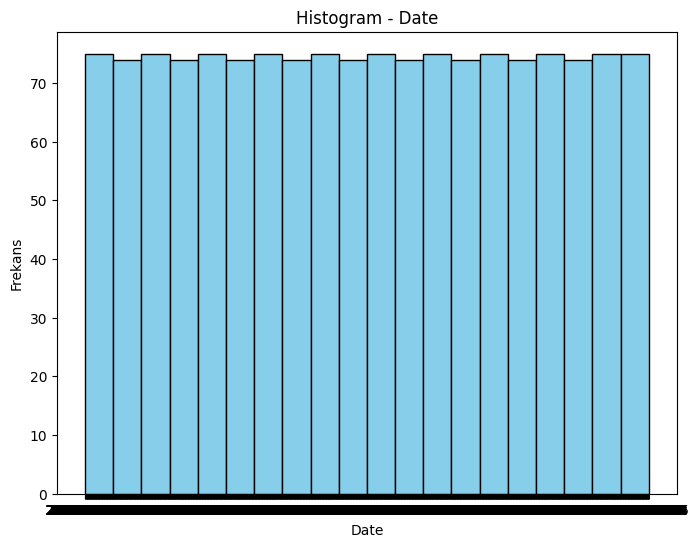

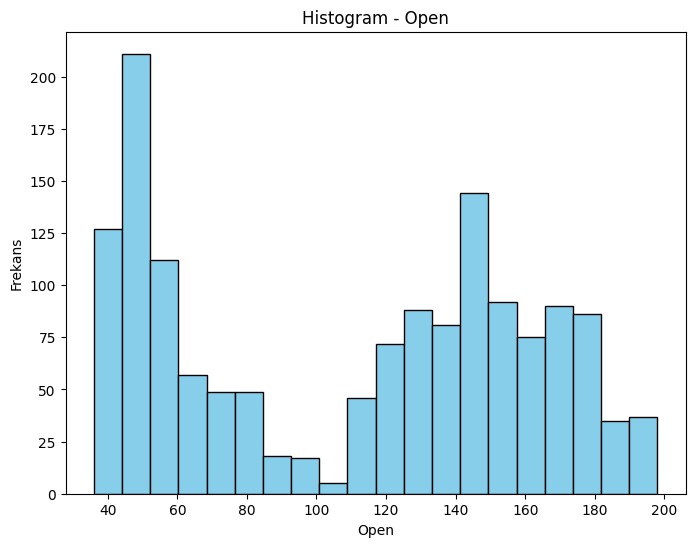

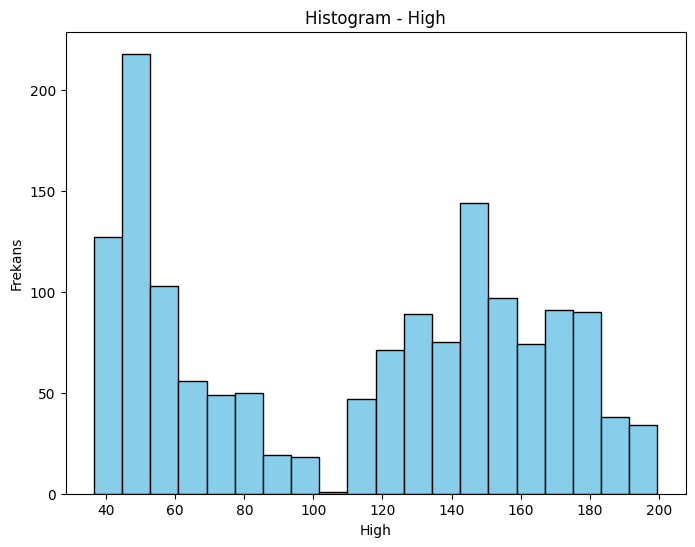

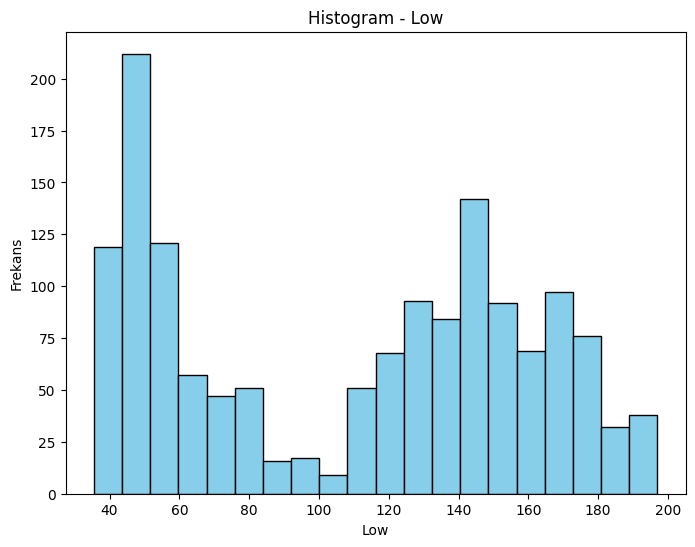

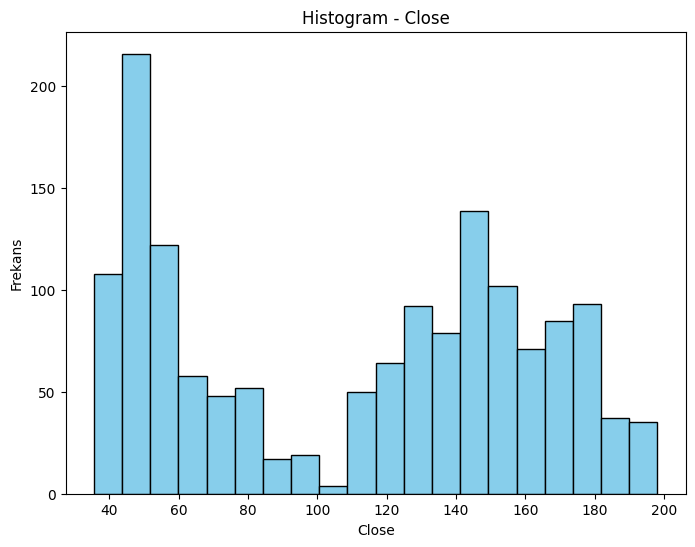

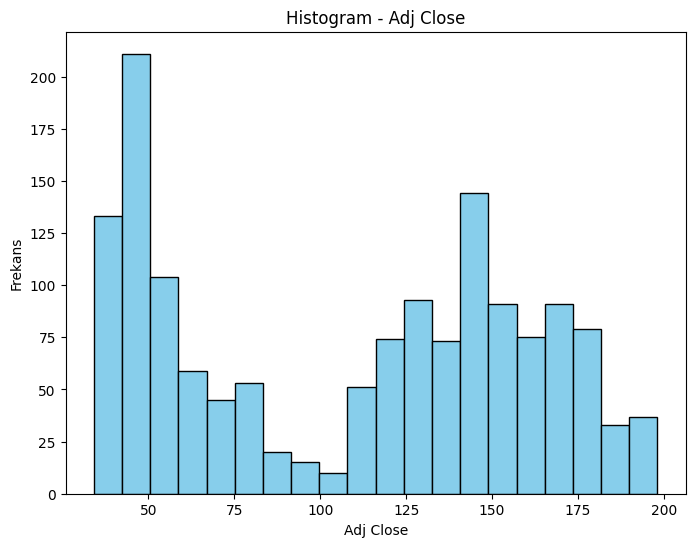

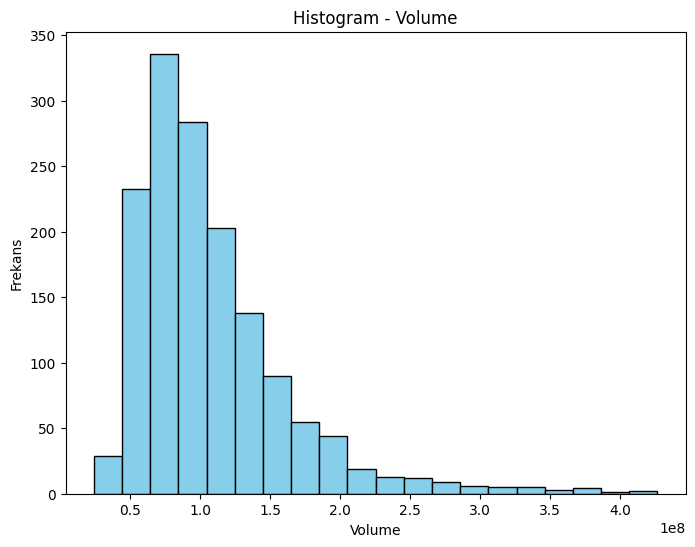

In [ ]:
# normal dağılım ve görsel normallik testleri (histogram)
for column in df.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(df[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram - {column}')
    plt.xlabel(column)
    plt.ylabel('Frekans')
    plt.show()

In [35]:
# belirli bir zaman diliminde açılış, kapanış, en yüksek ve en düşük fiyatlar
figure = go.Figure(data=[go.Candlestick(x=df["Date"],
                                        open=df["Open"],
                                        high=df["High"],
                                        low=df["Low"],
                                        close=df["Close"])])
figure.update_layout(title = "Apple Stock Price Analysis",
                     xaxis_rangeslider_visible=False)
figure.show()

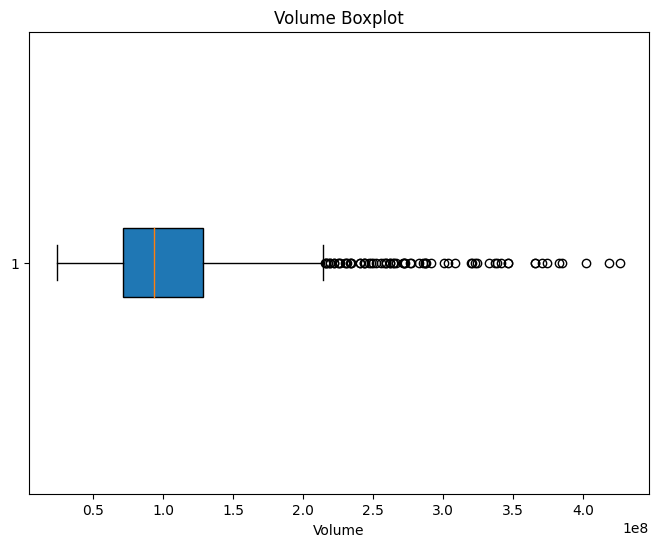

In [36]:
# Volume için boxplot çizimi
plt.figure(figsize=(8, 6))
plt.boxplot(df['Volume'], vert=False, patch_artist=True)
plt.title('Volume Boxplot')
plt.xlabel('Volume')
plt.show()

In [37]:
# Aykırı değerleri belirleme
Q1 = df['Volume'].quantile(0.25)
Q3 = df['Volume'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers = df[(df['Volume'] < lower_limit) | (df['Volume'] > upper_limit)]['Volume']
print("Aykırı Değerler:", outliers.tolist())

Aykırı Değerler: [346375200, 290954000, 272975200, 217562000, 282690400, 243278000, 261964400, 266157600, 224805200, 246876800, 271742800, 249616000, 384986800, 233292800, 365314800, 264654800, 243204000, 271300800, 248104000, 259092000, 382978400, 234330000, 365248800, 234428400, 219111200, 244439200, 259309200, 229722400, 277125600, 216071600, 221652400, 275978000, 216229200, 222195200, 230673600, 320605600, 426510000, 341397200, 319475600, 219178400, 226176800, 286744800, 285290000, 255598800, 418474000, 370732000, 322423600, 324056000, 300233600, 271857200, 401693200, 336752800, 287531200, 303602000, 252087200, 215250000, 240616800, 264476000, 374336800, 308151200, 338054800, 345937600, 225702700, 257599600, 332607200, 231366600, 287104900, 240226800, 262330500]


In [38]:
# Aykırı değerleri silme
df_cleaned = df[(df['Volume'] >= lower_limit) & (df['Volume'] <= upper_limit)]

# Temizlenmiş DataFrame'i yazdırma
print("Temizlenmiş DataFrame:")
print(df_cleaned)

Temizlenmiş DataFrame:
            Date        Open        High         Low       Close   Adj Close  \
0     2018-01-16   44.474998   44.847500   44.035000   44.047501   41.651932   
1     2018-01-17   44.037498   44.812500   43.767502   44.775002   42.339878   
2     2018-01-18   44.842499   45.025002   44.562500   44.814999   42.377689   
3     2018-01-19   44.652500   44.895000   44.352501   44.615002   42.188580   
4     2018-01-22   44.325001   44.445000   44.150002   44.250000   41.843418   
...          ...         ...         ...         ...         ...         ...   
1486  2023-12-11  193.110001  193.490005  191.419998  193.179993  193.179993   
1487  2023-12-12  193.080002  194.720001  191.720001  194.710007  194.710007   
1488  2023-12-13  195.089996  198.000000  194.850006  197.960007  197.960007   
1489  2023-12-14  198.020004  199.619995  196.160004  198.110001  198.110001   
1490  2023-12-15  197.529999  198.399994  197.000000  197.570007  197.570007   

         Volume 

In [39]:
# Bağımlı değişken (Y)
y = df['Adj Close']

# Bağımsız değişkenler (X)
X = df[['Open', 'High', 'Low', 'Close', 'Volume']]

# Sabit (intercept) ekleyerek regresyon modelini oluşturalım
X = sm.add_constant(X)

# Regresyon modelini uygulayalım
model = sm.OLS(y, X).fit()

# Modelin özetini görüntüleyelim
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.058e+06
Date:                Sat, 30 Dec 2023   Prob (F-statistic):               0.00
Time:                        07:06:19   Log-Likelihood:                -1090.2
No. Observations:                1491   AIC:                             2192.
Df Residuals:                    1485   BIC:                             2224.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1094      0.061    -34.860      0.0

In [42]:
# Tahminleri elde etme
predictions = model.predict(X)

# Tahminleri DataFrame'e ekleyerek inceleme
result_df = pd.DataFrame({'Gerçek Değerler': y, 'Tahmin Edilen Değerler': predictions})
print(result_df)

      Gerçek Değerler  Tahmin Edilen Değerler
0           41.651932               42.045882
1           42.339878               42.728756
2           42.377689               42.808325
3           42.188580               42.598563
4           41.843418               42.270595
...               ...                     ...
1486       193.179993              192.199822
1487       194.710007              193.726607
1488       197.960007              196.993228
1489       198.110001              197.139830
1490       197.570007              196.575414

[1491 rows x 2 columns]


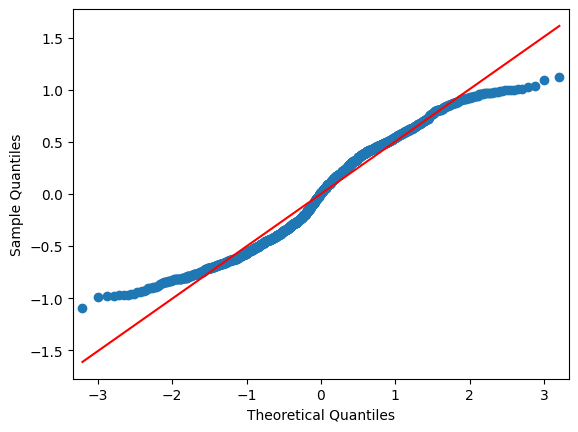

In [48]:
# kalıntılar
kalıntı = model.resid
fig = sm.qqplot(kalıntı, line="s")
plt.show()

In [49]:
# Ortalama Kare Hata (MSE)
mse = mean_squared_error(y, predictions)

# R-kare (R-squared)
r2 = r2_score(y, predictions)

# Ortalama Mutlak Hata (MAE)
mae = mean_absolute_error(y, predictions)

# Ortalama Mutlak Yüzde Hata (MAPE)
mape = np.mean(np.abs((y - predictions) / y)) * 100

print("\nPerformans Metrikleri:")
print("Ortalama Kare Hata (MSE):", mse)
print("Ortalama Mutlak Hata (MAE):", mae)
print("Ortalama Mutlak Yüzde Hata (MAPE):", mape)
print("R-kare (R-squared):", r2)


Performans Metrikleri:
Ortalama Kare Hata (MSE): 0.25270195956878855
Ortalama Mutlak Hata (MAE): 0.43903864846230395
Ortalama Mutlak Yüzde Hata (MAPE): 0.46906144776419506
R-kare (R-squared): 0.9999028804357568


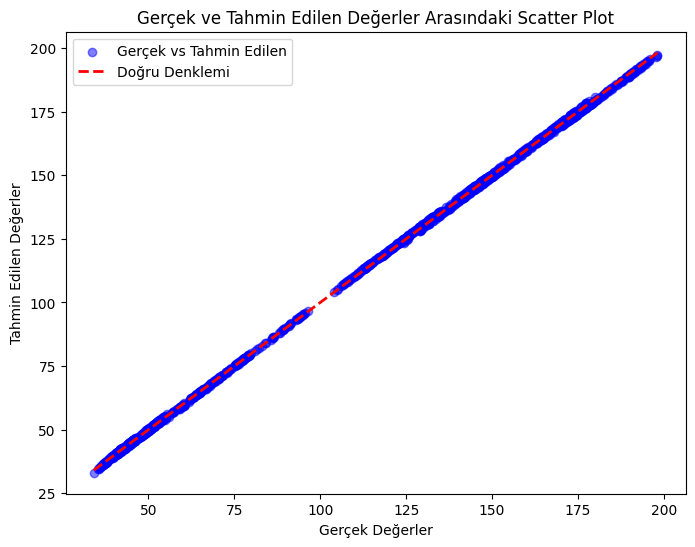

In [50]:
# Gerçek ve tahmin edilen değerleri alalım
y_actual = y
y_predicted = model.predict(X)

# Scatter plot çizimi
plt.figure(figsize=(8, 6))
plt.scatter(y_actual, y_predicted, alpha=0.5, color='blue', label='Gerçek vs Tahmin Edilen')
plt.plot([min(y_actual), max(y_actual)], [min(y_actual), max(y_actual)], color='red', linestyle='--', linewidth=2, label='Doğru Denklemi')

plt.title('Gerçek ve Tahmin Edilen Değerler Arasındaki Scatter Plot')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.legend()
plt.show()

In [51]:
# Örnek bir yeni veri seti oluşturalım (uygun veri yerine kendi verilerinizi eklemelisiniz)
# Adj Close: 194.71, 193.18, 195.71 166.67
new_data = {'Open': [193.08, 193.11	, 194.20, 170.37],
            'High': [194.72, 193.49, 195.99, 171.38],
            'Low': [191.72, 191.42, 193.67, 165.67],
            'Close': [194.71, 193.18, 195.71, 166.89],
            'Volume': [52.696, 60.943, 53.377, 70.625]}

new_df = pd.DataFrame(new_data)

# Sabit (intercept) ekleyerek yeni veri setini hazırlayalım
new_df = sm.add_constant(new_df)

# Modeli kullanarak tahminler yapalım
predictions_new = model.predict(new_df)

# Tahminleri ekrana yazdıralım
print("Yeni Veri Seti Tahminleri:")
print(predictions_new)


Yeni Veri Seti Tahminleri:
0    193.805413
1    192.290976
2    194.855863
3    165.752779
dtype: float64
